# Project: Wrangling and Analyze Data

#### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import requests 
import tweepy
import json
from tweepy import OAuthHandler
from IPython.display import Image
% matplotlib inline


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#load twitter_archive_enhanced.csv data
tweet_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
#visualize the loaded data
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
open('image-predictions.tsv', 'wb').write(response.content)

335079

In [5]:
#load image_prediction.tsv
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# extracting tweet_id 
# retweet_count and favorite_count 

# empty list to store tweet status dictionary
tweet_extra = []
with open('tweet-json.txt', 'r') as file:
     # read each JSON status
    for line in file:
        # convert json status object to a python dictionary
        tweet_content = json.loads(line)
        # get value for tweet_id in dictionary
        tweet_id = tweet_content['id']
        # get value for retweet_count in dictionary
        retweet_count = tweet_content['retweet_count']
        # get value for favorite_count in dictionary
        favorite_count = tweet_content['favorite_count']
        tweet_extra.append({'tweet_id':tweet_id,
                           'retweet_count':retweet_count,
                           'favorite_count':favorite_count})

In [7]:
# creating dataframe for tweet_extra
tweet_extension = pd.DataFrame(tweet_extra)


In [8]:
tweet_extension

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment
In this section we are going to assess the data by going through the column and rows manually and look out for anomalies in our datasets

In [9]:
#visualize the tweet_archive dataset
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
#visualize the image_prediction dataset
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
#visualize the tweet_extension dataset
tweet_extension

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


### Programmatic assessment
In this section we are going to use code to pull out anomalies in our datasets

In [12]:
#summary of the tweet_archive dataframe
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#summary of the image_prediction dataframe
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#summary of the tweet_extension dataframe
tweet_extension.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [15]:
#summary statistics of the tweet_archive dataframe
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
#summary statistics of image prediction dataframe
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
#summary statistics of the tweet extension dataframe
tweet_extension.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [18]:
#check for null values in tweet_archive dataset
tweet_archive.isnull().sum() 

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
#check for null values in image_prediction
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [20]:
#check for null values in tweet_extension
tweet_extension.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

In [21]:
#check tweet_archive for duplicates
tweet_archive.duplicated().sum()

0

In [22]:
#check image_prediction for duplicates
image_prediction.duplicated().sum()

0

In [23]:
#check tweet_extension for duplicates
tweet_extension.duplicated().sum()

0

In [24]:
#check for duplicate columns
all_columns = pd.Series(list(tweet_extension) + list(tweet_archive) + list(image_prediction))
all_columns[all_columns.duplicated()]

3     tweet_id
20    tweet_id
dtype: object

In [25]:
#show the number of retweets in tweet_archive
len(tweet_archive[tweet_archive['retweeted_status_id'].notnull()])

181

In [26]:
#checkin for unique rating denominators on tweet_archive dataframe
tweet_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
#checking for unique entries on image_prediction dataframe
image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [28]:
#checking for unique entries on tweet_archive dataframe
tweet_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [29]:
#checking for unique entries on tweet_extension dataframe
tweet_extension.nunique()

favorite_count    2007
retweet_count     1724
tweet_id          2354
dtype: int64

In [30]:
#checking for unique entries on column p1 of image_prediction
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
beagle                        18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [31]:
#checking for unique entries on column p2 of image_prediction
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
toy_terrier                        20
Samoyed                            20
miniature_pinscher                 20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [32]:
#check the name column on tweet_archive column
tweet_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Buddy           7
Daisy           7
Toby            7
Bailey          7
an              7
Oscar           6
Jack            6
Scout           6
Rusty           6
Jax             6
Stanley         6
Bella           6
Dave            6
Milo            6
Koda            6
Leo             6
Alfie           5
             ... 
Napolean        1
Theo            1
Remy            1
his             1
Ike             1
Josep           1
Toffee          1
Harry           1
Trevith         1
Geoff           1
Storkson        1
Tanner          1
Willy           1
Emma            1
life            1
Amy             1
Jeremy          1
Timber          1
Sprinkles       1
Duchess         1
Mark            1
Rey             1
Perry           1
Brandonald      1
Orion     

In [33]:
#show value counts for doggo column on tweet_archive
tweet_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [34]:
#show value counts for floofer column on tweet_archive
tweet_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [35]:
#show value counts for puppo column on tweet_archive
tweet_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [36]:
#show value counts for pupper column on tweet_archive
tweet_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [37]:
#check the retweeted_status_id entries
tweet_archive.retweeted_status_id.unique()

array([             nan,   8.87473957e+17,   8.86053734e+17,
         8.30583321e+17,   8.78057613e+17,   8.78281511e+17,
         6.69000397e+17,   8.76850772e+17,   8.66334965e+17,
         8.68880398e+17,   8.73213776e+17,   8.72657584e+17,
         8.41077006e+17,   8.59196979e+17,   8.68552279e+17,
         8.65013420e+17,   8.66450706e+17,   8.37820168e+17,
         8.63062472e+17,   8.06629075e+17,   8.60563773e+17,
         8.60914485e+17,   7.61672994e+17,   8.39549326e+17,
         8.57061112e+17,   8.44704788e+17,   8.56330159e+17,
         8.42163533e+17,   8.55122533e+17,   8.31650052e+17,
         8.29374342e+17,   8.48289382e+17,   8.33124695e+17,
         8.32369877e+17,   8.47971000e+17,   7.56288534e+17,
         7.73308824e+17,   8.07106841e+17,   8.17423860e+17,
         8.40632337e+17,   6.67152164e+17,   8.39289919e+17,
         8.38905981e+17,   7.83839966e+17,   8.20749717e+17,
         8.37011345e+17,   8.36648149e+17,   8.17827839e+17,
         7.86963064e+17,

In [38]:
#check the retweeted_status_user_id entries
tweet_archive.retweeted_status_user_id.unique()

array([             nan,   4.19698384e+09,   1.96074000e+07,
         5.12804507e+08,   1.54767397e+08,   7.87461778e+17,
         3.63890752e+08,   5.87097230e+07,   6.66990130e+07,
         7.47554344e+17,   3.41021133e+08,   5.97064155e+08,
         4.11984180e+07,   8.11740824e+08,   7.26634734e+08,
         7.12457247e+17,   4.46675020e+07,   4.87197737e+08,
         2.48855660e+07,   7.99237010e+07,   1.22832566e+09,
         1.73272909e+09,   1.95036846e+08,   2.80479778e+08,
         7.83214000e+05,   4.29683174e+09])

In [39]:
#check the retweeted_status_timestamp entries
tweet_archive.retweeted_status_timestamp.unique()

array([nan, '2017-07-19 00:47:34 +0000', '2017-07-15 02:44:07 +0000',
       '2017-02-12 01:04:29 +0000', '2017-06-23 01:10:23 +0000',
       '2017-06-23 16:00:04 +0000', '2015-11-24 03:51:38 +0000',
       '2017-06-19 17:14:49 +0000', '2017-05-21 16:48:45 +0000',
       '2017-05-28 17:23:24 +0000', '2017-06-09 16:22:42 +0000',
       '2017-06-08 03:32:35 +0000', '2017-03-13 00:02:39 +0000',
       '2017-05-02 00:04:57 +0000', '2017-05-27 19:39:34 +0000',
       '2017-05-18 01:17:25 +0000', '2017-05-22 00:28:40 +0000',
       '2017-03-04 00:21:08 +0000', '2017-05-12 16:05:02 +0000',
       '2016-12-07 22:38:52 +0000', '2017-05-05 18:36:06 +0000',
       '2017-05-06 17:49:42 +0000', '2016-08-05 21:19:27 +0000',
       '2017-03-08 18:52:12 +0000', '2017-04-26 02:37:47 +0000',
       '2017-03-23 00:18:10 +0000', '2017-04-24 02:13:14 +0000',
       '2017-03-16 00:00:07 +0000', '2017-04-20 18:14:33 +0000',
       '2017-02-14 23:43:18 +0000', '2017-02-08 17:00:26 +0000',
       '2017-04-01 2

### Quality issues
__image_prediction dataframe__

1. Entries on columns P1, P2 and P3 have mixed upper and lowercases

2. The column names are not as descriptive as they should

3. The image number column should be dropped since it has no significance

__tweet_archive dataframe__
4. The column source contains "a" html tags
5. Missing data on columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp, retweeted_status_user_id & retweeted_status_id

6. Wrong data type for the timestamp column

7. There are retweets on our dataset, yet we don't need retweets for this analysis

8. The column "name" has "None" entries instead of "NaN"

### Tidiness issues
1. The three datasets, tweet_archive, image_prediction and tweet_extension should be combined into one dataset

2. The columns "doggo", "floofer", "pupper" and "puppo" should be converted to one variable

## Cleaning Data
In this section,we are going to clean all the data issues mention above.

**Quick rule of thumb:** 
>We first deal with the issue of completness, that is missing data in any of the tables; then we solve the tidiness issues before we proceed with other quality issues

In [40]:
# Make copies of original pieces of data
tweet_archive_df = tweet_archive.copy()
image_prediction_df = image_prediction.copy()
tweet_extension_df = tweet_extension.copy()

### Issue #1: 
__tweet_archive dataset__:
> Missing data on columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp, retweeted_status_user_id

#### Define:
Use pandas "drop" method to drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp & retweeted_status_user_id columns since a bigger percentage of the data is missing

#### Code

In [41]:
#drop the columns
tweet_archive_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp',
                       'retweeted_status_user_id'], axis=1, inplace=True)

#### Test

In [42]:
#confirm they have been dropped
tweet_archive_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #2:
__tweet_archive dataset__:
> The columns "doggo", "floofer", "pupper" and "puppo" should be converted to one variable

#### Define
<li>Unpivot the columns using pandas Dataframe "melt" by creating "dog_stage" column and a "stage" column</li>
<li>Use Drop to drop the intermediate "stage" column</li>
<li>Then finally drop duplicated rows that came as a result of unpivoting the columns</li>

#### Code

In [43]:
#unpivot the columns
tweet_archive_df = pd.melt(tweet_archive_df, id_vars=['tweet_id','timestamp','source','text','retweeted_status_id',
                            'expanded_urls','rating_numerator','rating_denominator','name'],
                          var_name='stage', value_name='dog_stage')
#drop the stage column
tweet_archive_df = tweet_archive_df.drop('stage', axis=1)


In [44]:
tweet_archive_df.duplicated().sum()

6674

In [45]:
#drop the duplicates
tweet_archive_df.drop_duplicates(inplace=True)

#### Test

In [46]:
#confirm the columns are unpivoted
tweet_archive_df.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [47]:
#confirm the dog stages are present on dog_stage column
tweet_archive_df.dog_stage.value_counts()

None       2356
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [48]:
#confirm the shape
tweet_archive_df.shape

(2750, 10)

### Issue #3:
The three datasets, tweet_archive, image_prediction and tweet_extension should be combined into one dataset

#### Define
Use Pandas DataFrame "Merge" function to merge the 3 datasets

#### Code

In [49]:
#merge the 3 datasets on tweet_id
df_merged = pd.merge(tweet_archive_df, tweet_extension_df, on='tweet_id')
df_merged = pd.merge(df_merged, image_prediction_df, on = 'tweet_id')

#### Test

In [50]:
#view the merged dataframe
df_merged

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [51]:
#confirm the new shape
df_merged.shape

(2406, 23)

### Issue #4: 
> Entries on columns P1, P2 and P3 have mixed upper and lowercases

#### Define
use Pandas DataFrame .str.lower() function to convert all the string to lower case

#### Code

In [52]:
#convert the columns to lowercase
df_merged.p1 = df_merged.p1.str.lower()
df_merged.p2 = df_merged.p2.str.lower()
df_merged.p3 = df_merged.p3.str.lower()

#### Test

In [53]:
#confirm the changes
df_merged.p1.sample(1)

1441    car_mirror
Name: p1, dtype: object

In [54]:
#confirm the changes
df_merged.p2.sample(1)

645    kelpie
Name: p2, dtype: object

In [55]:
#confirm the changes
df_merged.p3.sample(1)

127    malamute
Name: p3, dtype: object

### Issue #5:
> Some column names are not as descriptive as they should

#### Define
Use pandas.DataFrame.rename to rename the columns

#### Code

In [56]:
#check the column names
df_merged.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [57]:
#rename the columns
df_merged.rename(columns = {"img_num":'image_number',
                         "p1":'prediction_1',
                         "p2":'prediction_2',
                         "p3":'prediction_3',
                         "p1_dog": 'is_prediction1_dog_breed',
                         "p2_dog": 'is_prediction2_dog_breed',
                         "p3_dog": 'is_prediction3_dog_breed',
                         "p1_conf":'prediction_1_confidence',
                         "p2_conf":'prediction_2_confidence',
                         "p3_conf":'prediction_3_confidence'}, inplace=True)

#### Test

In [58]:
#confirm the changes
df_merged.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'favorite_count', 'retweet_count', 'jpg_url',
       'image_number', 'prediction_1', 'prediction_1_confidence',
       'is_prediction1_dog_breed', 'prediction_2', 'prediction_2_confidence',
       'is_prediction2_dog_breed', 'prediction_3', 'prediction_3_confidence',
       'is_prediction3_dog_breed'],
      dtype='object')

### Issue #6:
The image number column should be dropped since it has no significance

#### Define
> Use pandas DataFrame.drop() to drop the column

#### Code

In [59]:
#drop the column
df_merged.drop('image_number', axis=1, inplace=True)

#### Test

In [60]:
#confirm
df_merged.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'favorite_count', 'retweet_count', 'jpg_url',
       'prediction_1', 'prediction_1_confidence', 'is_prediction1_dog_breed',
       'prediction_2', 'prediction_2_confidence', 'is_prediction2_dog_breed',
       'prediction_3', 'prediction_3_confidence', 'is_prediction3_dog_breed'],
      dtype='object')

### Issue #7:
The column source contains "a" html tags

#### Define
> Use pandas DataFrame.str.extract to remove the html tag

#### Code

In [61]:
#extract the exact sources
df_merged.source = df_merged.source.str.extract('^<a.+>(.+)</a>$')

#### Test

In [62]:
#confirm
df_merged.source.value_counts()

Twitter for iPhone    2362
Twitter Web Client      31
TweetDeck               13
Name: source, dtype: int64

### Issue #8:
Wrong data type for the timestamp column

#### Define
> Use pandas.to_datetime to convert the timestamp column into datetime format

#### Code

In [63]:
#convert the timesttamp column to datetime
df_merged.timestamp = pd.to_datetime(df_merged.timestamp)

#### Test

In [64]:
#check the data types
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 0 to 2405
Data columns (total 22 columns):
tweet_id                    2406 non-null int64
timestamp                   2406 non-null datetime64[ns]
source                      2406 non-null object
text                        2406 non-null object
retweeted_status_id         95 non-null float64
expanded_urls               2406 non-null object
rating_numerator            2406 non-null int64
rating_denominator          2406 non-null int64
name                        2406 non-null object
dog_stage                   2406 non-null object
favorite_count              2406 non-null int64
retweet_count               2406 non-null int64
jpg_url                     2406 non-null object
prediction_1                2406 non-null object
prediction_1_confidence     2406 non-null float64
is_prediction1_dog_breed    2406 non-null bool
prediction_2                2406 non-null object
prediction_2_confidence     2406 non-null float64
is_predic

### Issue #9:
There are retweets on our dataset, yet we don't need retweets for this analysis

#### Define
<ul>use pandas.DataFrame.query function to extract rows with  missing data on retweeted_status_id</ul>
<ul>this dataframe will contain just the actual tweets and no retweets</ul>

#### Code

In [65]:
#extract the actual tweets by querying for null retweets
df_merged = df_merged.query('retweeted_status_id == "NaN"')

#### Test

In [66]:
#confirm the retweeted_status_id column just contains NaN values
df_merged.retweeted_status_id.unique()

array([ nan])

### Issue #10: 
The column "name" has "None" entries instead of "NaN"


#### Define
Use Pandas DataFrame.replace function to replace the "None" entries with "NaN"

#### Code

In [67]:
# replacing none values with NaN in the "name"  column 
df_merged.name.replace(to_replace='None', value=np.NaN, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Test

### Issue #10: 
The column "name" has invalid entries such as "a","the","an"


#### Define
Use Pandas DataFrame.replace function to replace the invalid entries with "NaN"

#### Code

In [68]:
# replacing invalid entries with NaN in the "name"  column 
df_merged['name'] = df_merged['name'].str.replace('^[a-z]+', 'NaN')



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [69]:
#confirm the results
df_merged.name.sample(5)

1543    Chipson
2290        NaN
1089      Terry
2303        NaN
2020    Pumpkin
Name: name, dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
#save the cleaned merged dataset to a csv
df_merged.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Pupper is the most popular dog_stage

2. Twitter for iPhone is the most popular source for dog_tweets

3.  Cooper is the most popular dog's name

1. Pupper is the most popular dog_stage

In [71]:
#dog_stage counts
df_merged.dog_stage.value_counts()

None       1994
pupper      212
doggo        74
puppo        23
floofer       8
Name: dog_stage, dtype: int64

2. Twiiter for iPhone is the most popular source for dog_tweets

In [72]:
#source of tweets counts
df_merged.source.value_counts()

Twitter for iPhone    2269
Twitter Web Client      29
TweetDeck               13
Name: source, dtype: int64

3.  Cooper is the most popular dog's name

In [73]:
#names of the dogs counts
df_merged.name.value_counts().head()

NaN        111
Cooper      13
Oliver      12
Charlie     12
Lucy        11
Name: name, dtype: int64

### Visualization

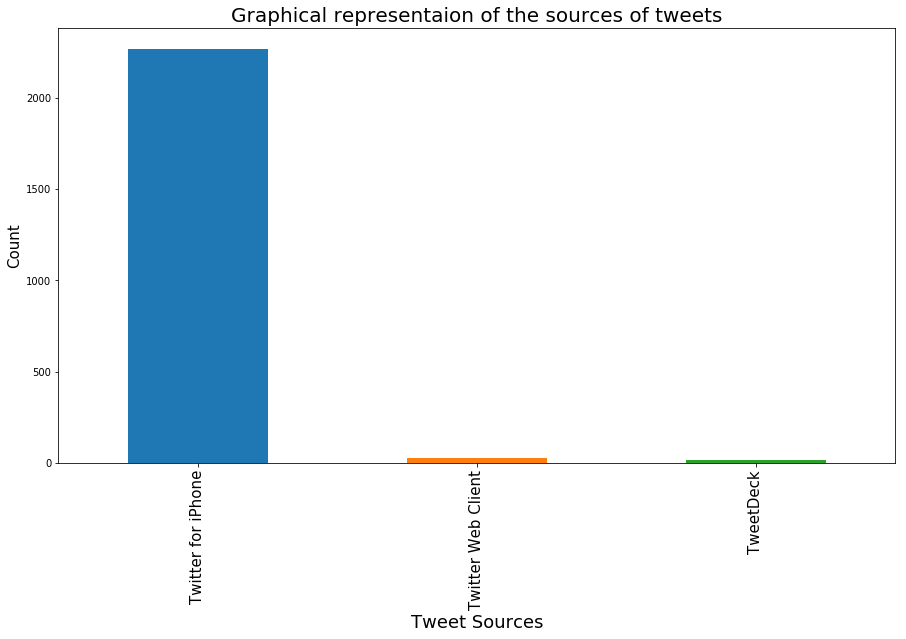

In [74]:
#import the relevant library
import matplotlib.pyplot as plt
#plot
plt.figure(figsize = (15,8))
ax = df_merged['source'].value_counts().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(),fontsize = 15)
#set the x&y lables
plt.xlabel("Tweet Sources",fontsize = 18)
plt.ylabel("Count",fontsize = 15)
#set the title
plt.title("Graphical representaion of the sources of tweets",fontsize = 20)
#save the image
plt.savefig("Tweet_sources.png")
plt.show();